In [28]:
import pandas as pd
from pandas import *
#from fbprophet import Prophet
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

ImportError: cannot import name 'mean_absolute_percentage_error' from 'sklearn.metrics' (/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

In [4]:
# Chargement du fichier
month = pd.read_csv("./SN_m_tot_V2.0.csv", sep = ";", names = ["year", "month", "day", "value", "s1", "s2", "s3"])

In [5]:
# Jointure des colonnes year, month
month["year"] = month["year"].astype(str)
month["month"] = month["month"].astype(str)
month['period'] = month[['year', 'month']].apply(lambda x: '-'.join(x), axis=1)

In [6]:
# Utilsation des colonnes period et valeur
month_f = month[["period","value"]]
# Renommage des colonnes period et valeur en ds et y (étape obligatoire à faire pour le modèle prophète, 
# il n'accepte que les colonnes de noms : ds;y )
month_f.columns = ['ds', 'y']
month_f['ds'] = to_datetime(month_f['ds'])

<ipython-input-6-01f915491aec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_f['ds']= to_datetime(month_f['ds'])


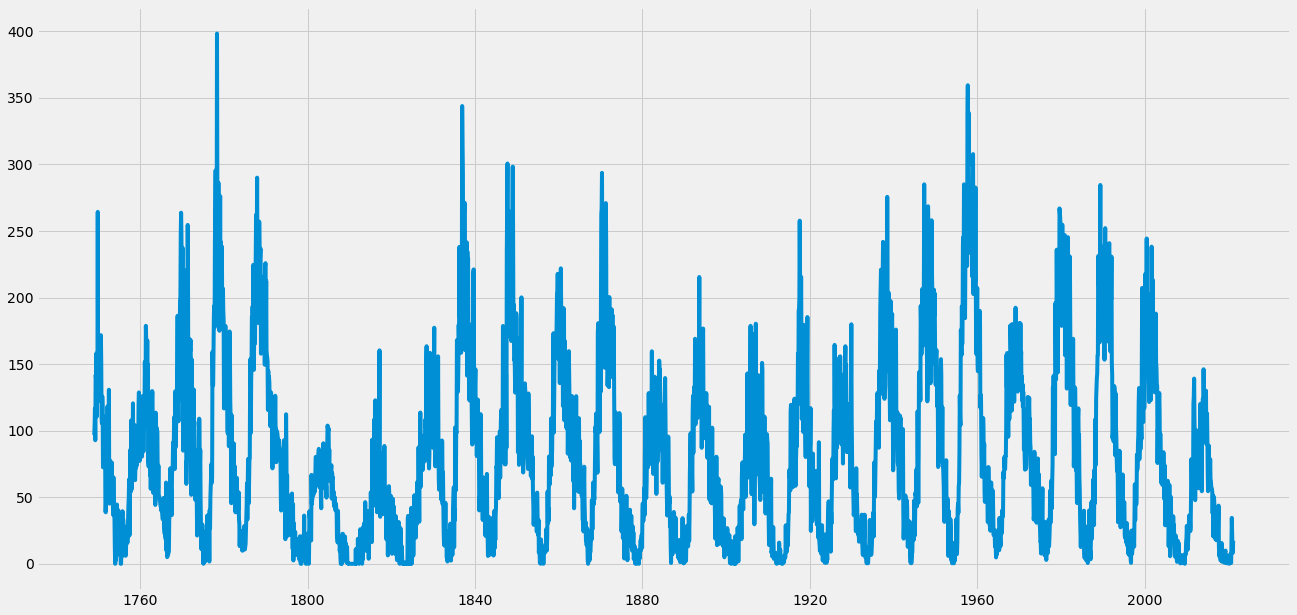

In [16]:
# Tracé de la série
f, ax = plt.subplots(figsize=(20, 10))
plt.style.use("fivethirtyeight")
plt.plot(month_f['ds'],month_f['y'])

In [ ]:
# define the model
model = Prophet()
# fit the model
model.fit(month_f)

In [22]:
# Génération de la liste de date future
future = list()
for i in range(3, 12):
    date = '2021-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

In [ ]:
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [ ]:
# calculate MAE 
y_true = month_f['y'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

In [ ]:
mape = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %f' % mape)

In [ ]:
R2 = r2_score(y_true, y_pred)
print('R2: %f' % R2)

In [29]:
import numpy as np
from matplotlib import pyplot as plt

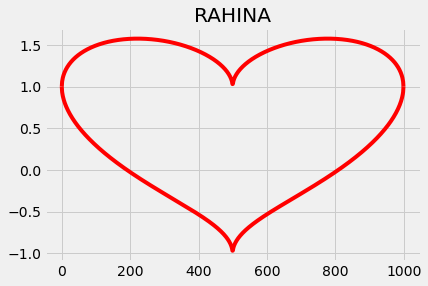

In [33]:
x = np.linspace(-1,1,1000)
f1 = np.sqrt(abs(x)) - np.sqrt(1-x**2)
f2 = np.sqrt(abs(x)) + np.sqrt(1-x**2)
plt.figure()
plt.plot(f1, "r")
plt.plot(f2, "r")
plt.title("RAHINA")
plt.show()

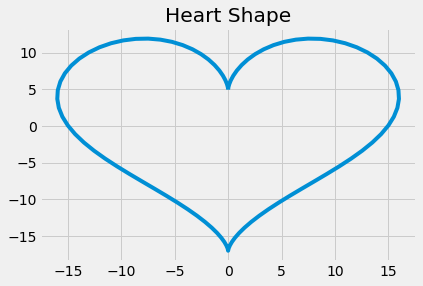

In [34]:
# Creating equally spaced 100 data in range 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Generating x and y data
x = 16 * ( np.sin(theta) ** 3 )
y = 13 * np.cos(theta) - 5* np.cos(2*theta) - 2 * np.cos(3*theta) - np.cos(4*theta)

# Plotting
plt.plot(x, y)
plt.title('Heart Shape')
plt.show()